In [1]:
from platform import python_version
print(python_version())

3.7.6


In [3]:
#Example 1 : Linear Regression
#1.1  Importing tensorflow and other libraries
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

[0.665011   0.80871135 0.76330626 0.1362676  0.6715624  0.20050693
 0.28918296 0.42896223 0.903297   0.8625207  0.8157582  0.72460157
 0.10903443 0.8016393  0.49961466 0.67278624 0.8044233  0.2596894
 0.06161629 0.86357343 0.10896302 0.8859607  0.33098114 0.40738875
 0.8773758  0.3232875  0.40938026 0.9739335  0.96205795 0.8689766
 0.0716459  0.12815246 0.39164248 0.5768859  0.5713932  0.02606972
 0.41382012 0.9994782  0.45017245 0.17055248 0.3611656  0.25087917
 0.22174121 0.40304863 0.59431046 0.5987152  0.0199198  0.46077022
 0.71134496 0.7657206  0.12520222 0.7214596  0.5536223  0.74656487
 0.98365873 0.80793613 0.38492283 0.2003272  0.51498085 0.7601619
 0.5386103  0.46849185 0.3764883  0.3161155  0.17459174 0.7563369
 0.79129314 0.89088327 0.49293634 0.19104227 0.43613705 0.9272326
 0.8119217  0.8973679  0.15112078 0.9546273  0.5939913  0.7066417
 0.07443246 0.4065261  0.00617791 0.18554719 0.2957305  0.7472175
 0.7447825  0.97634995 0.96427244 0.14852235 0.09701476 0.91726387
 0

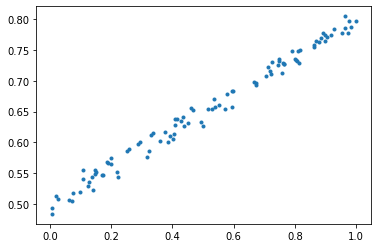

In [5]:
#1.2 Creating input data using NumPy. y = x * 0.3 + 0.5 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
print(x_data)
y_data = 0.3 * x_data  + 0.5 + noise

pylab.plot(x_data, y_data, '.')

In [7]:
#1.3 Building inference graph
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random.uniform([1], 0.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

print(W)
print(b)
print(y)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.7416165], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>
tf.Tensor(
[0.4931831  0.5997537  0.5660805  0.1010583  0.49804172 0.14869924
 0.21446285 0.31812546 0.66989994 0.6396596  0.60497975 0.53737646
 0.08086172 0.59450895 0.37052247 0.49894938 0.5965736  0.19258994
 0.04569566 0.6404403  0.08080877 0.65704304 0.24546106 0.3021262
 0.65067637 0.23975533 0.30360314 0.72228515 0.713478   0.6444474
 0.05313378 0.09503998 0.29044852 0.42782807 0.4237546  0.01933374
 0.30689582 0.74122953 0.3338553  0.12648453 0.26784638 0.18605612
 0.16444694 0.29890752 0.44075045 0.44401705 0.01477285 0.3417148
 0.52754515 0.56787103 0.09285203 0.53504634 0.41057542 0.5536648
 0.72949755 0.59917873 0.28546512 0.14856596 0.38191828 0.5637486
 0.39944226 0.3474413  0.27920994 0.23443647 0.12948011 0.56091195
 0.58683604 0.6606937  0.3655697  0.1416801  0.32344642 0.687651
 0.6021345  0

In [8]:
#1.4 Defining forward function and building training graph
def forward(x):
    return W * x + b
 
learning_rate = 0.5
optimizer = tf.keras.optimizers.Adam(learning_rate)
loss_fn = tf.keras.losses.MeanSquaredError()

y_initial_values = y #Save initial values for plotting later.

def train_step(inputs):
    with tf.GradientTape() as tape:
        y_pred = forward(inputs)
        loss = loss_fn(y_data, y_pred)
        
    gradients = tape.gradient(loss, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b]))
    return loss

In [11]:
#1.5 Performing training and check forwarded outputs after 200th iteration
for step in range(201):
    loss = train_step(x_data)
    if step % 20 == 0 :
        print("#%s Wt W: %s b: %s loss: %s" % (step, W.numpy(), b.numpy(), loss.numpy()))
print(forward(x_data))

#0 Wt W: [0.98332626] b: [0.33907688] loss: 0.3134224
#20 Wt W: [0.07737127] b: [0.5168907] loss: 0.004061797
#40 Wt W: [0.32419315] b: [0.44468468] loss: 0.0031735706
#60 Wt W: [0.30455437] b: [0.5146215] loss: 0.00041226842
#80 Wt W: [0.29519096] b: [0.5008084] loss: 0.0001409661
#100 Wt W: [0.3019258] b: [0.49606183] loss: 0.00010785293
#120 Wt W: [0.30030996] b: [0.49845538] loss: 0.00010252079
#140 Wt W: [0.30025843] b: [0.49924254] loss: 0.000101892285
#160 Wt W: [0.30058858] b: [0.49915043] loss: 0.00010181258
#180 Wt W: [0.30059] b: [0.49900246] loss: 0.00010180474
#200 Wt W: [0.30062005] b: [0.4990396] loss: 0.00010180469
tf.Tensor(
[0.69895524 0.7421544  0.7285048  0.5400044  0.7009247  0.559316
 0.5859738  0.62799424 0.77058876 0.7583306  0.7442729  0.71686935
 0.53181756 0.74002844 0.64923376 0.70129263 0.74086535 0.5771074
 0.5175627  0.7586471  0.53179604 0.76537716 0.5985392  0.62150884
 0.76279634 0.5962263  0.6221075  0.7918235  0.7882535  0.7602714
 0.5205778  0.53756

(0, 1.5)

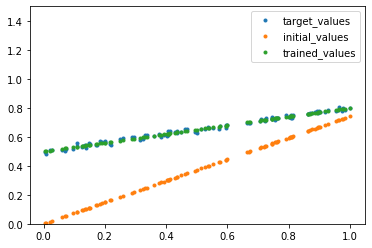

In [12]:
#1.6 Comparing the initial regression 
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, ".", label="initial_values")
pylab.plot(x_data, forward(x_data), ".", label="trained_values")
pylab.legend()
pylab.ylim(0,1.5)